<a href="https://colab.research.google.com/github/salemprakash/EDA/blob/main/Module%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 4
1D Analysis

In [1]:
#Load the necessary package for 1D analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
mtcars = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/mtcars.csv")

In [3]:
# Select a numerical column for analysis
num_col = "mpg"


In [4]:
# Calculate summary statistics
mean_val = mtcars[num_col].mean()
median_val = mtcars[num_col].median()
mode_val = mtcars[num_col].mode().values[0]
skewness_val = mtcars[num_col].skew()
kurtosis_val = mtcars[num_col].kurt()

In [5]:
# Print summary statistics
print("Summary Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Skewness: {skewness_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

Summary Statistics:
Mean: 20.09
Median: 19.20
Mode: 10.40
Skewness: 0.67
Kurtosis: -0.02


/tmp/ipython-input-1357502787.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mtcars[num_col], kde=False, rug=True)


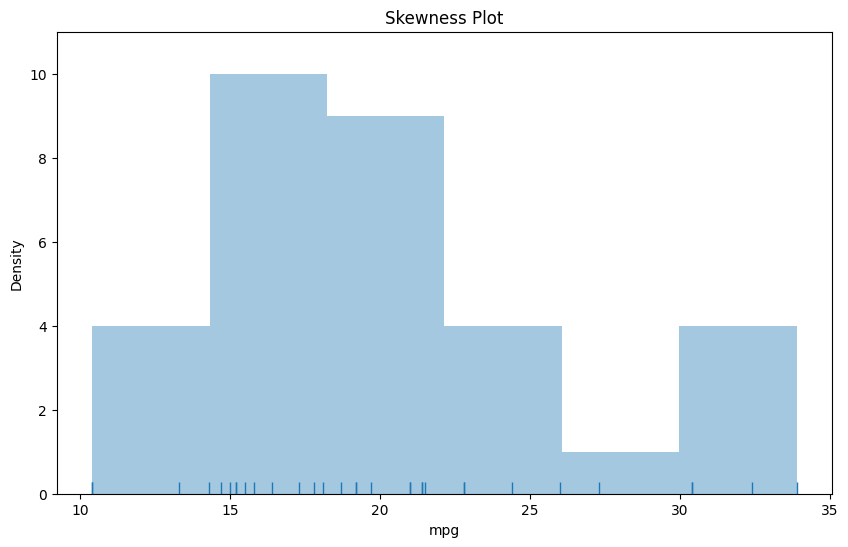

In [6]:
# Create a skewness plot
plt.figure(figsize=(10, 6))
sns.distplot(mtcars[num_col], kde=False, rug=True)
plt.title("Skewness Plot")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.show()

/tmp/ipython-input-2774489023.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mtcars[num_col], shade=True)


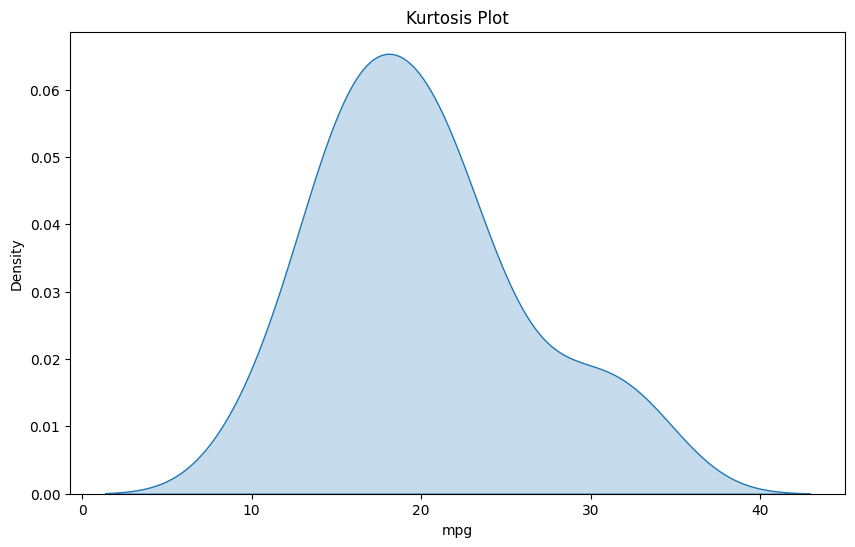

In [7]:
# Create a kurtosis plot
plt.figure(figsize=(10, 6))
sns.kdeplot(mtcars[num_col], shade=True)
plt.title("Kurtosis Plot")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.show()

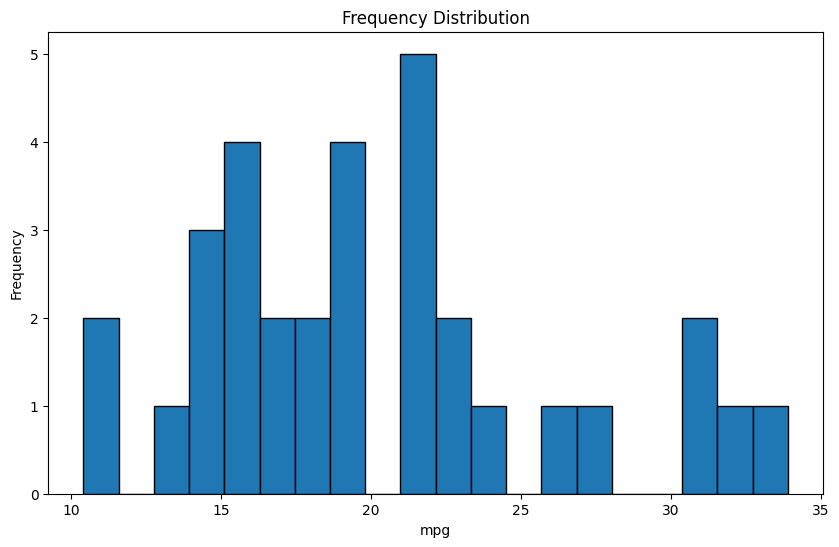

In [8]:
# Create a histogram with frequency
plt.figure(figsize=(10, 6))
mtcars[num_col].plot.hist(bins=20, edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()

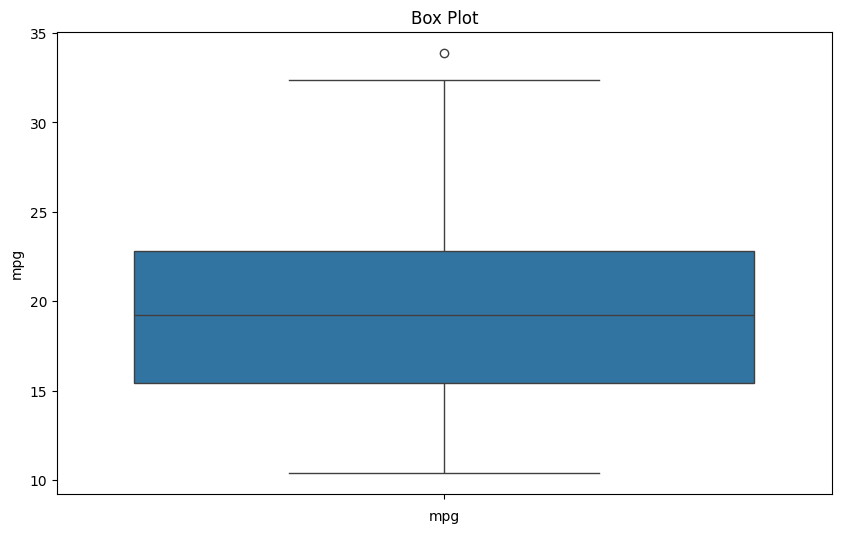

In [9]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(mtcars[num_col])
plt.title("Box Plot")
plt.xlabel(num_col)
plt.show()

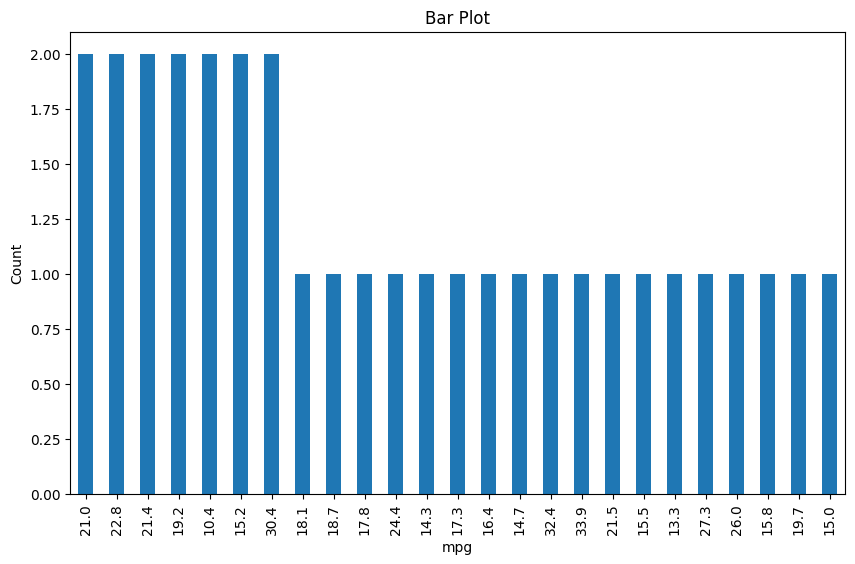

In [10]:
# Create a bar plot
plt.figure(figsize=(10, 6))
mtcars[num_col].value_counts().plot(kind="bar")
plt.title("Bar Plot")
plt.xlabel(num_col)
plt.ylabel("Count")
plt.show()

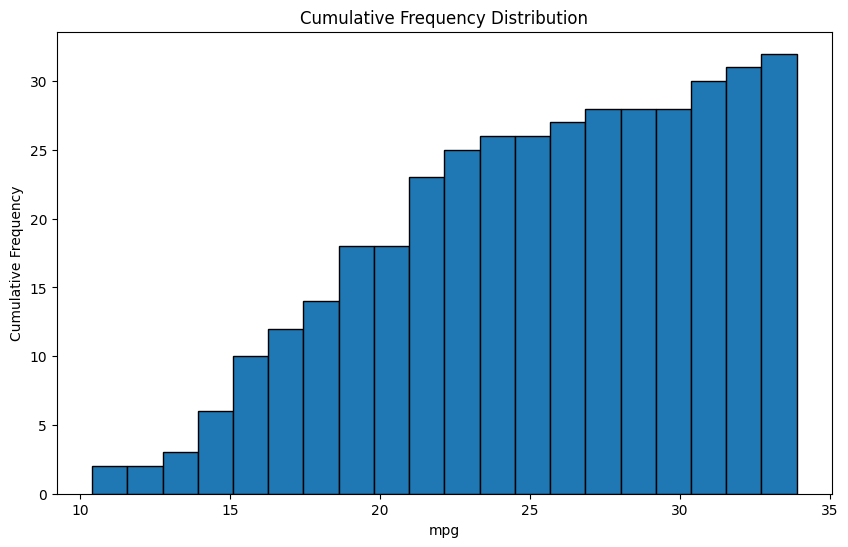

In [11]:
# Create a cumulative frequency plot
plt.figure(figsize=(10, 6))
mtcars[num_col].plot(kind="hist", cumulative=True, bins=20, edgecolor="black")
plt.title("Cumulative Frequency Distribution")
plt.xlabel(num_col)
plt.ylabel("Cumulative Frequency")
plt.show()

In [12]:
pip install python-ternary

/usr/local/lib/python3.12/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


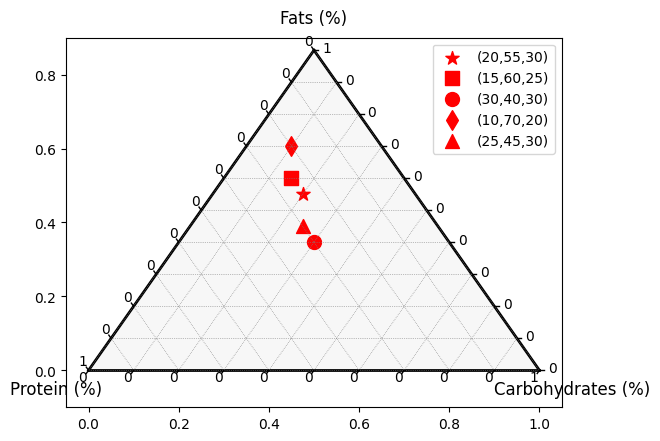

In [13]:
import ternary
import matplotlib.pyplot as plt

# Data: Patient ID, Protein (%), Carbohydrates (%), Fats (%), Symbol
data = [
    (20, 55, 30, "*"),  # Patient 1 (Star)
    (15, 60, 25, "s"),  # Patient 2 (Square for differentiation)
    (30, 40, 30, "o"),  # Patient 3 (Circle)
    (10, 70, 20, "d"),  # Patient 4 (Diamond)
    (25, 45, 30, "^")   # Patient 5 (Triangle)
]

# Normalize Data: Convert percentages to proportions summing to 1
normalized_data = [(p/100, c/100, f/100, symbol) for p, c, f, symbol in data]

# Create a ternary plot
scale = 1  # Since data is already in proportion
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)  # Draw boundary
tax.gridlines(color="gray", multiple=0.1)  # Gridlines for readability

# Plot points with respective symbols
for p, c, f, symbol in normalized_data:
    tax.scatter([(p, c, f)], marker=symbol, color='red', s=100, label=f"({p*100:.0f},{c*100:.0f},{f*100:.0f})")

# Set Labels
tax.left_corner_label("Protein (%)", fontsize=12)
tax.right_corner_label("Carbohydrates (%)", fontsize=12)
tax.top_corner_label("Fats (%)", fontsize=12)

# Ticks and Styling
tax.ticks(axis='lbr', multiple=0.1, linewidth=1, fontsize=10)
tax.legend()
tax.show()